Dostęp:

http://skm.srv.pl

login: raport_ogolny

hasło: hasło proszę o mail na rkucharski@edu.pl

## 1. Import libraries

In [78]:
import pandas as pd # biblioteka do analiz danych
import matplotlib
%matplotlib inline

## 2. Read data

In [79]:
df = pd.read_csv('data.csv', encoding = "cp1250", sep = ";", index_col=0) 
# odczytaj plik csv o okreslonym kodowaniu znakow i znaku oddzielajacym kolumny
del df['Unnamed: 12']

In [80]:
df.head()

,EZT,Półkurs,Numer taborowy,Linia,Data startu półkursu,Nazwa przystanku,Weszło,Wyszło,Stan pasażerów,Data zdarzenia,Nr przystanku
L.P.,,,,,,,,,,,
1,19WE-01,ZACH - OTWOCK,301,S1,2019-03-12 04:01:54,WARSZAWA ZACHODNIA,1,0 (0),1,2019-03-12 04:01:54,1
2,19WE-01,ZACH - OTWOCK,301,S1,2019-03-12 04:01:54,WARSZAWA OCHOTA,0,0,1,2019-03-12 04:06:10,2
3,19WE-01,ZACH - OTWOCK,301,S1,2019-03-12 04:01:54,WARSZAWA ŚRÓDMIEŚCIE,2,4,-1,2019-03-12 04:09:27,3
4,19WE-01,ZACH - OTWOCK,301,S1,2019-03-12 04:01:54,WARSZAWA POWIŚLE,2,0,1,2019-03-12 04:12:24,4
5,19WE-01,ZACH - OTWOCK,301,S1,2019-03-12 04:01:54,WARSZAWA STADION,1,1,1,2019-03-12 04:15:29,5


In [81]:
df.shape

(14569, 11)

In [82]:
df.columns

Index(['EZT', 'Półkurs', 'Numer taborowy', 'Linia', 'Data startu półkursu',
       'Nazwa przystanku', 'Weszło', 'Wyszło', 'Stan pasażerów',
       'Data zdarzenia', 'Nr przystanku'],
      dtype='object')

In [83]:
df['Data zdarzenia'] = pd.to_datetime(df['Data zdarzenia'])
df['Data startu półkursu'] = pd.to_datetime(df['Data startu półkursu'])
df['Stan pasażerów']=df['Stan pasażerów'].astype(int)

In [84]:
df['Weszło']=df['Weszło'].apply(lambda x: int(x.split()[0]))
df['Wyszło']=df['Wyszło'].apply(lambda x: int(x.split()[0]))
df['Weszło']=df['Weszło'].astype(int)
df['Wyszło']=df['Wyszło'].astype(int)

In [85]:
df.head()

,EZT,Półkurs,Numer taborowy,Linia,Data startu półkursu,Nazwa przystanku,Weszło,Wyszło,Stan pasażerów,Data zdarzenia,Nr przystanku
L.P.,,,,,,,,,,,
1,19WE-01,ZACH - OTWOCK,301,S1,2019-03-12 04:01:54,WARSZAWA ZACHODNIA,1,0,1,2019-03-12 04:01:54,1
2,19WE-01,ZACH - OTWOCK,301,S1,2019-03-12 04:01:54,WARSZAWA OCHOTA,0,0,1,2019-03-12 04:06:10,2
3,19WE-01,ZACH - OTWOCK,301,S1,2019-03-12 04:01:54,WARSZAWA ŚRÓDMIEŚCIE,2,4,-1,2019-03-12 04:09:27,3
4,19WE-01,ZACH - OTWOCK,301,S1,2019-03-12 04:01:54,WARSZAWA POWIŚLE,2,0,1,2019-03-12 04:12:24,4
5,19WE-01,ZACH - OTWOCK,301,S1,2019-03-12 04:01:54,WARSZAWA STADION,1,1,1,2019-03-12 04:15:29,5


# 3. EDA (wizualizacja i analiza)

In [60]:
df.describe()

,Numer taborowy,Weszło,Wyszło,Stan pasażerów,Nr przystanku
count,14569.000000,14569.000000,14569.000000,14569.000000,14569.000000
mean,449.553435,17.380671,16.729975,105.693253,10.108106
std,68.108319,35.362507,30.030035,128.903071,6.108937
min,301.000000,0.000000,0.000000,-652.000000,1.000000
25%,404.000000,2.000000,2.000000,25.000000,5.000000
50%,502.000000,7.000000,7.000000,66.000000,10.000000
75%,505.000000,19.000000,18.000000,138.000000,15.000000
max,509.000000,2056.000000,662.000000,2037.000000,23.000000


In [62]:
df.groupby('Linia')[['Weszło','Wyszło','Stan pasażerów']].describe().T

Linia                          S1           S2           S3           S9
Weszło         count  8571.000000  2591.000000  2071.000000  1336.000000
               mean     19.426788    15.909301    14.929986    10.906437
               std      39.559070    27.475645    26.529055    31.013146
               min       0.000000     0.000000     0.000000     0.000000
               25%       3.000000     1.000000     2.000000     1.000000
               50%       8.000000     6.000000     5.000000     3.000000
               75%      21.000000    18.000000    16.000000     8.000000
               max    2056.000000   316.000000   251.000000   339.000000
Wyszło         count  8571.000000  2591.000000  2071.000000  1336.000000
               mean     18.426905    15.781552    14.271849    11.493263
               std      31.309046    26.516363    26.103436    32.716647
               min       0.000000     0.000000     0.000000     0.000000
               25%       3.000000     2.000000     1.000000     1.000000
               50%       8.000000     6.000000     5.000000     3.000000
               75%      21.000000    18.000000    15.000000     8.000000
               max     662.000000   265.000000   223.000000   313.000000
Stan pasażerów count  8571.000000  2591.000000  2071.000000  1336.000000
               mean    127.802240    73.951756    83.265089    60.180389
               std     141.938406    98.135559   101.071514    97.565388
               min    -652.000000  -142.000000  -301.000000  -130.000000
               25%      41.000000    16.000000    21.000000     6.000000
               50%      91.000000    41.000000    50.000000    22.000000
               75%     163.000000    89.000000    91.000000    61.250000
               max    2037.000000   703.000000   557.000000   478.000000

In [63]:
df.groupby('Linia')[['Weszło','Wyszło']].sum()

,Weszło,Wyszło
Linia,,
S1,166507,157937
S2,41221,40890
S3,30920,29557
S9,14571,15355


Linia
S1    AxesSubplot(0.125,0.125;0.775x0.755)
S2    AxesSubplot(0.125,0.125;0.775x0.755)
S3    AxesSubplot(0.125,0.125;0.775x0.755)
S9    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Stan pasażerów, dtype: object

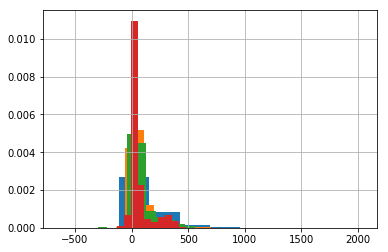

In [64]:
df.groupby('Linia')['Stan pasażerów'].hist(density=True)

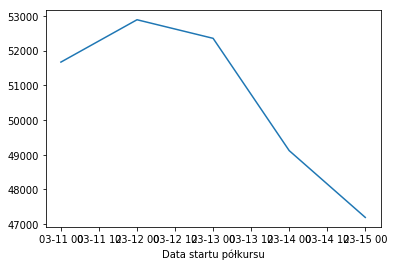

In [100]:
df.groupby(df['Data startu półkursu'].dt.date)['Weszło'].sum().plot()

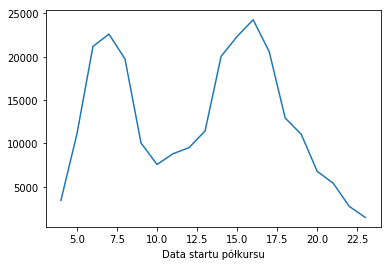

In [99]:
df.groupby(df['Data startu półkursu'].dt.hour)['Weszło'].sum().plot()

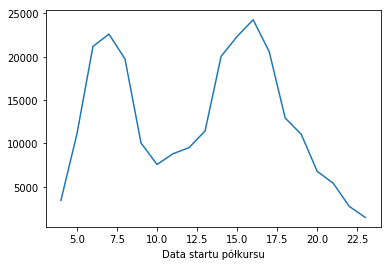

In [103]:
df.groupby(df['Data startu półkursu'].dt.hour)['Weszło'].sum().plot()

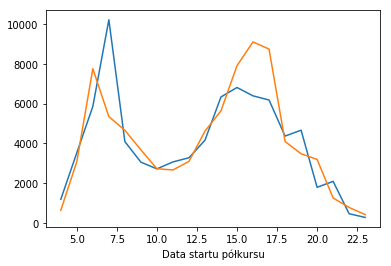

In [118]:
df[(df.Linia == 'S1') & (df['Półkurs']=='OTWOCK - PRUSZKÓW')].groupby(df['Data startu półkursu'].dt.hour)['Weszło'].sum().plot()
df[(df.Linia == 'S1') & (df['Półkurs']=='PRUSZKÓW - OTWOCK')].groupby(df['Data startu półkursu'].dt.hour)['Weszło'].sum().plot()

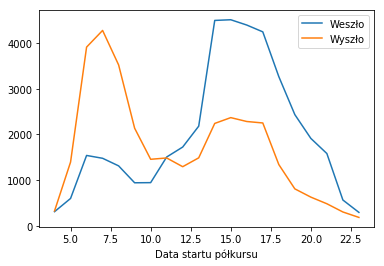

In [121]:
df[df['Nazwa przystanku'] == 'WARSZAWA ŚRÓDMIEŚCIE'].groupby(df['Data startu półkursu'].dt.hour).sum()[['Weszło','Wyszło']].plot()